# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
#Build query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
temp_imperial = "imperial"
query_url = url + "appid=" + weather_api_key + "&units=" + temp_imperial + "&q="

#Create lists for each column for dataframe
found_cities = []
lats = []
lngs = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
dates = []

#Keeps track of found cities and creates new set every 49 cities
record_count = 0
set_count = 1

#Create a for loop appending data to each list above
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        cloudinesses.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        #Adds to count for found cities
        if record_count > 48:
            record_count = 1
            set_count += 1
            found_cities.append(city)
        else:
            record_count += 1
            found_cities.append(city)
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #If city not found raises exception and prints skip
    except Exception:
        print("City not found. Skipping...")
        
print("------------------------------\nData Retrieval Complete\n------------------------------")
print(len(found_cities))            
print(len(lats))
print(len(lngs))
print(len(max_temps))
print(len(humidities))
print(len(cloudinesses))
print(len(wind_speeds))
print(len(countries))
print(len(dates))

Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | qrendi
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | makakilo city
Processing Record 6 of Set 1 | bose
Processing Record 7 of Set 1 | sinjai
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | auki
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | rincon
City not found. Skipping...
Processing Record 12 of Set 1 | aswan
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | bengkulu
Processing Record 15 of Set 1 | verkhnevilyuysk
Processing Record 16 of Set 1 | dingle
Processing Record 17 of Set 1 | moerai
Processing Record 18 of Set 1 | kamarion
Processing Record 19 of Set 1 | tongchuan
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | kiama
Processing Record 23 of Set 1 | ribeira grande
Processing Record 24 of Set 1 | victoria

Processing Record 39 of Set 4 | ngama
Processing Record 40 of Set 4 | fortuna
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | redmond
Processing Record 43 of Set 4 | brokopondo
Processing Record 44 of Set 4 | tezu
Processing Record 45 of Set 4 | shiyan
Processing Record 46 of Set 4 | san buenaventura
Processing Record 47 of Set 4 | khatanga
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | nantucket
Processing Record 1 of Set 5 | baykit
Processing Record 2 of Set 5 | seymchan
Processing Record 3 of Set 5 | brae
Processing Record 4 of Set 5 | banjar
Processing Record 5 of Set 5 | nadym
Processing Record 6 of Set 5 | darnah
Processing Record 7 of Set 5 | hun
Processing Record 8 of Set 5 | ostrovnoy
Processing Record 9 of Set 5 | alta floresta
Processing Record 10 of Set 5 | severo-kurilsk
Processing Record 11 of Set 5 | gore
Processing Record 12 of Set 5 | port lincoln
Processing Record 13 of Set 5 | tooele
Processing Record 14 of 

Processing Record 25 of Set 8 | pontianak
Processing Record 26 of Set 8 | hirara
Processing Record 27 of Set 8 | boden
Processing Record 28 of Set 8 | lata
Processing Record 29 of Set 8 | muncar
Processing Record 30 of Set 8 | bontang
Processing Record 31 of Set 8 | takoradi
Processing Record 32 of Set 8 | saint-georges
Processing Record 33 of Set 8 | meulaboh
Processing Record 34 of Set 8 | sindor
Processing Record 35 of Set 8 | tilichiki
Processing Record 36 of Set 8 | lyuban
Processing Record 37 of Set 8 | bagotville
Processing Record 38 of Set 8 | okhotsk
Processing Record 39 of Set 8 | rocha
Processing Record 40 of Set 8 | jumla
Processing Record 41 of Set 8 | luderitz
Processing Record 42 of Set 8 | knyaginino
Processing Record 43 of Set 8 | quesnel
Processing Record 44 of Set 8 | sedona
Processing Record 45 of Set 8 | lincoln
Processing Record 46 of Set 8 | petrozavodsk
Processing Record 47 of Set 8 | rossosh
Processing Record 48 of Set 8 | boda
Processing Record 49 of Set 8 | a

Processing Record 18 of Set 12 | kirkuk
Processing Record 19 of Set 12 | garmsar
Processing Record 20 of Set 12 | hohhot
Processing Record 21 of Set 12 | namibe
Processing Record 22 of Set 12 | beloha
Processing Record 23 of Set 12 | lagoa
Processing Record 24 of Set 12 | maria aurora
Processing Record 25 of Set 12 | sao jose da coroa grande
Processing Record 26 of Set 12 | denpasar
City not found. Skipping...
City not found. Skipping...
Processing Record 27 of Set 12 | santa maria
Processing Record 28 of Set 12 | prenzlau
Processing Record 29 of Set 12 | sarankhola
Processing Record 30 of Set 12 | ewa beach
City not found. Skipping...
Processing Record 31 of Set 12 | tshikapa
Processing Record 32 of Set 12 | atherton
City not found. Skipping...
Processing Record 33 of Set 12 | serpa
------------------------------
Data Retrieval Complete
------------------------------
572
572
572
572
572
572
572
572
572


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [81]:
# create a dictionary for dataframe
weather_dict = {
    "City":found_cities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity":humidities,
    "Cloudiness":cloudinesses,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates,
}


# create dataframe
weather_dataframe = pd.DataFrame(weather_dict)

# Save city data into a csv file
weather_dataframe.to_csv("../output_data/cities.csv", index = False)

#show top of dataframe
weather_dataframe.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,61.66,53,1,12.06,AU,1632189986
1,chuy,-33.6971,-53.4616,54.43,88,84,16.78,UY,1632189986
2,qrendi,35.8347,14.4583,76.66,88,0,9.22,MT,1632189987
3,kruisfontein,-34.0033,24.7314,53.02,74,83,15.73,ZA,1632189938
4,makakilo city,21.3524,-158.0865,83.55,49,1,9.22,US,1632189987


In [44]:
#Calculate summary statistics and save into dataframe
sum_stats = weather_dataframe.describe()
sum_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,22.199732,27.829459,63.562605,70.562937,54.274476,7.645385,1.632190e+09
std,32.450521,87.114653,16.807207,20.986725,41.744866,5.401587,1.192357e+02
min,-54.800000,-175.200000,12.670000,9.000000,0.000000,0.000000,1.632189e+09
25%,-5.230625,-39.253300,50.465000,58.750000,7.750000,3.940000,1.632190e+09
50%,25.922900,29.763800,67.470000,75.000000,62.500000,5.880000,1.632190e+09
75%,50.502800,103.560325,77.680000,87.000000,99.000000,10.405000,1.632190e+09
max,78.218600,179.316700,95.490000,100.000000,100.000000,33.220000,1.632190e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [67]:
humdity_over_nine_thousand = weather_dataframe.loc[weather_dataframe['Humidity'] == 100]
humdity_over_nine_thousand_cities = weather_dataframe.loc[weather_dataframe['Humidity'] == 100]['City']

In [76]:
#  Get the indices of cities that have humidity over 100%.
humdity_over_nine_thousand_cities
weather_dataframe = weather_dataframe.drop(index=[10, 105, 213, 244, 295])

In [77]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,61.66,53,1,12.06,AU,1632189986
1,chuy,-33.6971,-53.4616,54.43,88,84,16.78,UY,1632189986
2,qrendi,35.8347,14.4583,76.66,88,0,9.22,MT,1632189987
3,kruisfontein,-34.0033,24.7314,53.02,74,83,15.73,ZA,1632189938
4,makakilo city,21.3524,-158.0865,83.55,49,1,9.22,US,1632189987


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

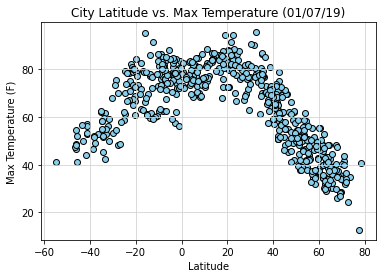

In [82]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

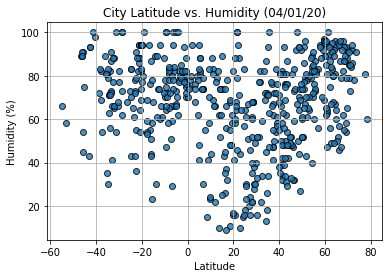

In [11]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

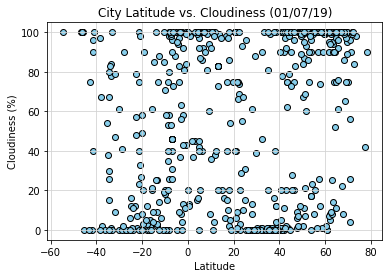

In [83]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

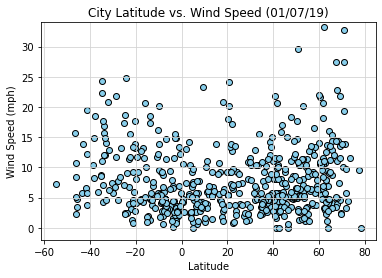

In [85]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/fig4.png")
plt.show()

## Linear Regression

In [89]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) > 0, :]
southern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line-equation is: y = -0.78x + 92.13
The r-squared is: -0.87172199718988


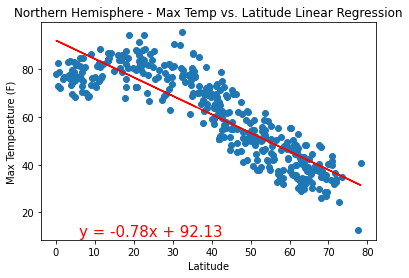

In [101]:
x = pd.to_numeric(northern_df['Lat']).astype(float)
y = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"Regression line-equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line-equation is: y = 0.66x + 81.03
The r-squared is: 0.732267402978367


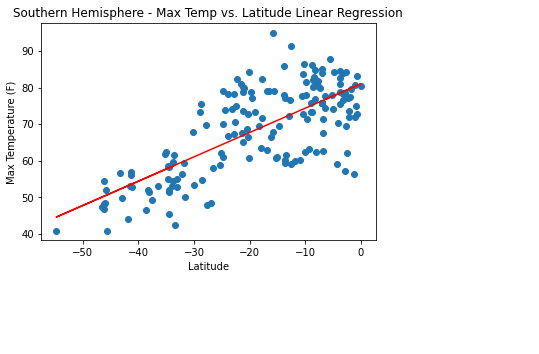

In [102]:
x = pd.to_numeric(southern_df['Lat']).astype(float)
y = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"Regression line-equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line-equation is: y = 0.02x + 72.05
The r-squared is: 0.02008771617631064


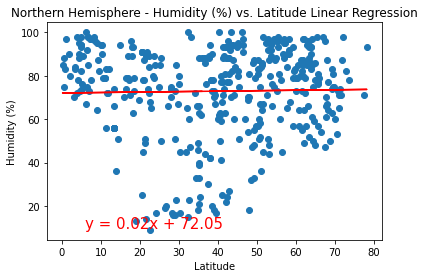

In [103]:
x = pd.to_numeric(northern_df['Lat']).astype(float)
y = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"Regression line-equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.04x + 66.01
The r-squared is: 0.027386084698420854


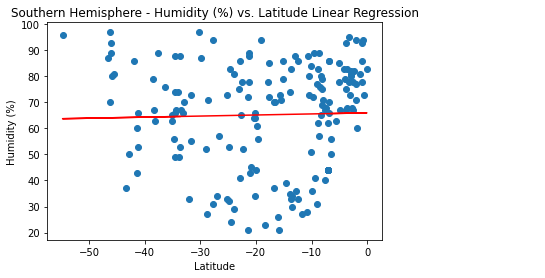

In [104]:
x = pd.to_numeric(southern_df['Lat']).astype(float)
y = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.36x + 43.86
The r-squared is: 0.17007340685785852


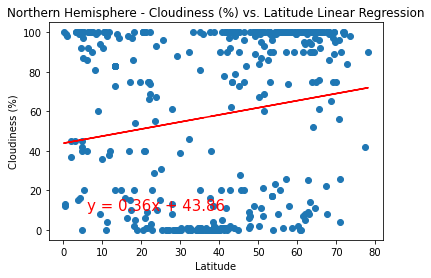

In [106]:
x = pd.to_numeric(northern_df['Lat']).astype(float)
y = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.17x + 48.57
The r-squared is: 0.06108438124485742


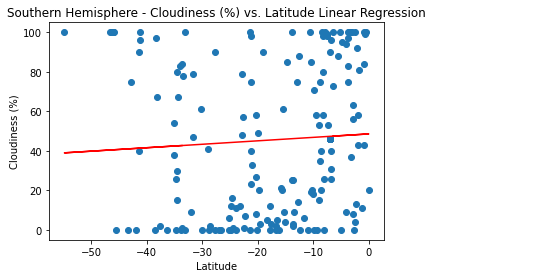

In [107]:
x = pd.to_numeric(southern_df['Lat']).astype(float)
y = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.06x + 5.05
The r-squared is: 0.23267615083392504


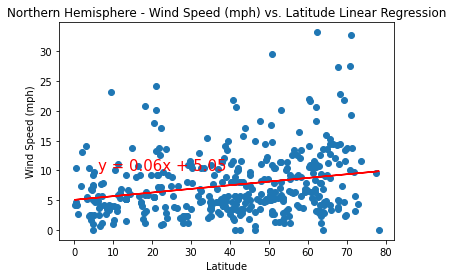

In [108]:
x = pd.to_numeric(northern_df['Lat']).astype(float)
y = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.13x + 5.53
The r-squared is: -0.3236555795859138


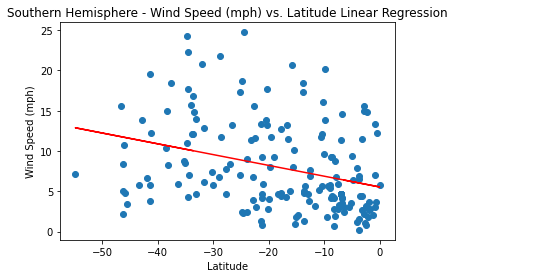

In [110]:
x = pd.to_numeric(southern_df['Lat']).astype(float)
y = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

plt.show()